In [1]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss
import thinkplot
import thinkstats2

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,5)

import warnings
warnings.filterwarnings("ignore")

<h1>Assignment 2: Life Expectancy and You!</h1>

<b>Instructions:</b>
<ul>
<li>Use the worksheet below to act as a guide to exploring and examining the data in the dataset.
<li>Try to make things easy to read. Look at the formatting stuff above. 
<li>As long as you do what is asked, you can do things in many different ways. You may need to do a little searching. 
</ul>

### Please Use Formatting to Make it Clear What I Should be Looking at! Please!!! I Beg You!!!

In [2]:
#Load data and do some cleanup before starting
#Please don't change this stuff. 

#dfLE = pd.read_csv("led.csv")       Kept getting File Not Found Error

dfLE = pd.read_csv("../data3450-assignment-2-mlsiebold/data/led.csv")     
dfLE.rename(columns={"Status":"isDeveloped", }, inplace=True)
dfLE["isDeveloped"].replace(('Developed', 'Developing'), (1, 0), inplace=True)
dfLE = dfLE.drop(columns={"Year", "Incomecompositionofresources", "thinness5-9years", "HIV/AIDS", "percentageexpenditure", "Totalexpenditure", "thinness1-19years"})
dfLE = dfLE.groupby("Country", as_index=False).mean()
dfLE.head()


,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling
0,Afghanistan,0.0,58.19375,269.0625,78.2500,0.014375,64.562500,2362.2500,15.51875,107.5625,48.3750,52.3125,4.136734e+09,9.972260e+06,8.21250
1,Albania,0.0,75.15625,45.0625,0.6875,4.848750,98.000000,53.3750,49.06875,0.9375,98.1250,98.0625,1.166938e+09,6.969116e+05,12.13750
2,Algeria,0.0,73.61875,108.1875,20.3125,0.406667,78.000000,1943.8750,48.74375,23.5000,91.7500,91.8750,7.345597e+10,2.164983e+07,12.71250
3,Angola,0.0,49.01875,328.5625,83.7500,5.740667,70.222222,3561.3125,18.01875,132.6250,46.1250,47.6875,2.177835e+10,1.014710e+07,8.04375
4,AntiguaandBarbuda,0.0,75.05625,127.5000,0.0000,7.949333,98.266667,0.0000,38.42500,0.0000,96.9375,98.3125,0.000000e+00,NaN,8.84375


In [3]:
dfLE.describe()

,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling
count,191.000000,183.000000,183.000000,191.000000,189.000000,182.000000,191.000000,187.000000,191.000000,191.000000,191.000000,1.910000e+02,1.440000e+02,178.000000
mean,0.167539,69.224932,164.796448,29.133835,4.486793,79.287713,2326.165576,39.117146,40.412631,82.832863,82.628740,4.550119e+10,1.265734e+07,12.027739
std,0.374438,9.186432,96.185159,113.691604,3.873123,17.417697,7924.050116,17.175529,154.310693,15.925330,16.433269,1.305612e+11,3.827961e+07,3.104852
min,0.000000,46.112500,18.750000,0.000000,0.010000,9.000000,0.000000,5.200000,0.000000,29.812500,26.812500,0.000000e+00,2.920000e+02,1.531250
25%,0.000000,62.475000,80.406250,0.000000,1.000000,68.150000,4.781250,20.887500,0.000000,72.000000,72.375000,4.776139e+06,9.623203e+05,9.971875
50%,0.000000,72.487500,146.562500,2.625000,3.582667,83.376068,138.937500,43.843750,3.250000,88.187500,88.500000,2.662176e+09,3.665163e+06,12.359375
75%,0.000000,75.106250,219.593750,21.062500,7.466000,94.687500,1501.593750,52.275000,25.281250,96.062500,96.031250,1.508067e+10,1.034789e+07,14.093750
max,1.000000,82.537500,550.062500,1366.687500,13.497333,99.000000,65857.937500,87.300000,1812.500000,99.000000,99.000000,1.004677e+12,4.214677e+08,20.037500


In [4]:
dfLE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           191 non-null    object 
 1   isDeveloped       191 non-null    float64
 2   Lifeexpectancy    183 non-null    float64
 3   AdultMortality    183 non-null    float64
 4   infantdeaths      191 non-null    float64
 5   Alcohol           189 non-null    float64
 6   HepatitisB        182 non-null    float64
 7   Measles           191 non-null    float64
 8   BMI               187 non-null    float64
 9   under-fivedeaths  191 non-null    float64
 10  Polio             191 non-null    float64
 11  Diphtheria        191 non-null    float64
 12  GDP               191 non-null    float64
 13  Population        144 non-null    float64
 14  Schooling         178 non-null    float64
dtypes: float64(14), object(1)
memory usage: 22.5+ KB


<h2>Part 1: Add a column for GDP per Capita (5pts)</h2>

Show print the labels along with just that column. Print 10 random rows of that data. 

Note: you'll have to look at the units to ensure you get it right. 

In [5]:
# How many countries have zero or null values in Population and GDP columns?

nullGDP = dfLE[dfLE['GDP'].isnull()]['Country'].count()
nullPop = dfLE[dfLE['Population'].isnull()]['Country'].count()
zeroGDP = dfLE[dfLE['GDP']==0]['Country'].count()    
zeroPop = dfLE[dfLE['Population']==0]['Country'].count()

print(f'GDP is NULL = {nullGDP}\nPopulation is NULL = {nullPop}\nGDP is ZERO = {zeroGDP}\nPopulation is ZERO = {zeroPop}\nRow Count = {dfLE.shape[0]}')

GDP is NULL = 0
Population is NULL = 47
GDP is ZERO = 47
Population is ZERO = 0
Row Count = 191


In [6]:
# Drop rows with null population values

df = dfLE[dfLE['Population'].notnull()]                                          

In [7]:
# Now how many countries have zero or null values in Population and GDP columns?  Fingers crossed - they should all be zero.

nullGDP2 = df[df['GDP'].isnull()]['Country'].count()
nullPop2 = df[df['Population'].isnull()]['Country'].count()
zeroGDP2 = df[df['GDP']==0]['Country'].count()    
zeroPop2 = df[df['Population']==0]['Country'].count()

print(f'GDP is NULL = {nullGDP2}\nPopulation is NULL = {nullPop2}\nGDP is ZERO = {zeroGDP2}\nPopulation is ZERO = {zeroPop2}\nRow Count = {df.shape[0]} (s/b {(dfLE.shape[0] - nullPop)})')

GDP is NULL = 0
Population is NULL = 0
GDP is ZERO = 0
Population is ZERO = 0
Row Count = 144 (s/b 144)


In [8]:
#Part 1

df['GDPperCapita'] = (df['GDP'] / df['Population'])         # Calc GDP per capita
df[['Country','GDPperCapita']].sample(10)                   # Display 10 random rows                  

,Country,GDPperCapita
64,Germany,25922.230806
101,Malaysia,4117.493318
76,India,692.150781
86,Kazakhstan,3006.906815
77,Indonesia,2341.243997
75,Iceland,33467.123454
24,Bulgaria,5490.517494
183,Uruguay,7304.866699
127,Palau,1932.122370
160,SriLanka,828.792356


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 190
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           144 non-null    object 
 1   isDeveloped       144 non-null    float64
 2   Lifeexpectancy    143 non-null    float64
 3   AdultMortality    143 non-null    float64
 4   infantdeaths      144 non-null    float64
 5   Alcohol           142 non-null    float64
 6   HepatitisB        136 non-null    float64
 7   Measles           144 non-null    float64
 8   BMI               142 non-null    float64
 9   under-fivedeaths  144 non-null    float64
 10  Polio             144 non-null    float64
 11  Diphtheria        144 non-null    float64
 12  GDP               144 non-null    float64
 13  Population        144 non-null    float64
 14  Schooling         144 non-null    float64
 15  GDPperCapita      144 non-null    float64
dtypes: float64(15), object(1)
memory usage: 19.1+ KB


### Part 2: Print a visualization of each distribution. Both regular (density) and cumulative. (15pts)

Print each distribution is some type of visualization, also print the cumulative distribution. 
<ul>
<li>5 points are for using some visualization that is effective.
<li>5 points for formatting things in a nice layout. Hint: for whatever chart you use, look into some formatting options. Think of what to try to Google for an example for printing multiple charts, a grid of charts, etc... and try to adapt one to yours. There is also a way to do it using some thinkstats/thinkplot stuff. 
<li><b>5 points are for doing it in an efficient way - just listing off each column is lots of typing... Remember, the #1 trait of programmers is laziness with respect to repetitive tasks. If we are doing the same thing over and over with tiny changes, try to think of a condensed way to do this...</b>
</ul>

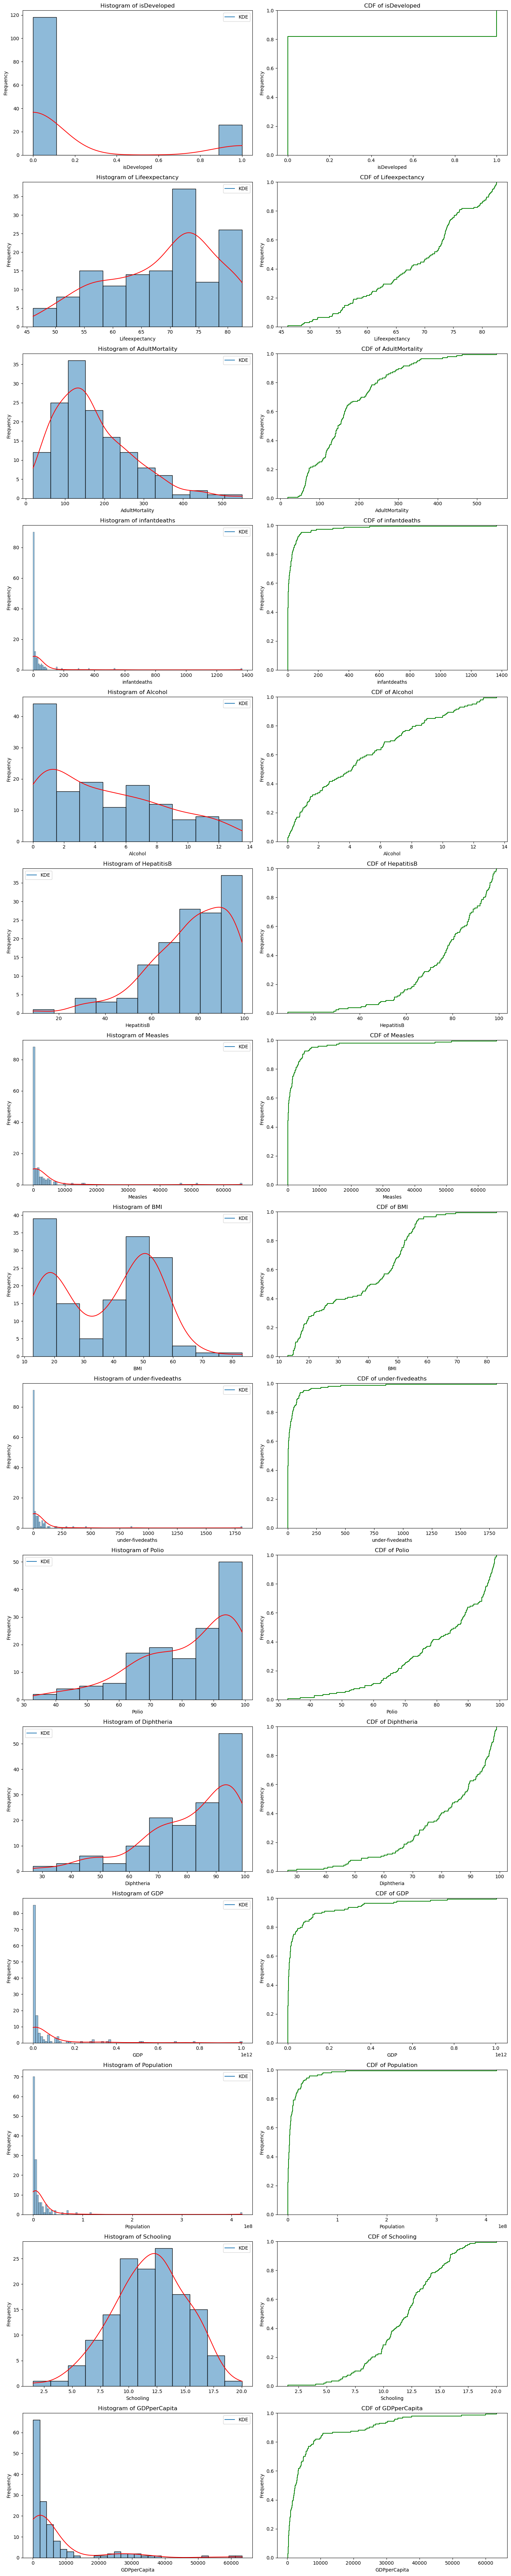

In [10]:
#Print all distributions

columns = df.select_dtypes(include='float').columns.to_list()                               # Get list of float column names
subplot_rows = len(columns)                                                                 # Base number of subplot rows on the number of columns in list
subplot_cols = 2                                                                            # Base number of subplot columns on number of plot types (hist and CDF)

fig, axes = plt.subplots(subplot_rows, subplot_cols, figsize=(15, 5*subplot_rows))          # Create subplots based on number of columns in list
axes = axes.flatten()                                                                       # Convert 2D array to 1D for 

for i, column in enumerate(columns):                                                        # Loop through columns list and enumerate

    sns.histplot(df[column], kde=True, line_kws={'label':'KDE'}, ax=axes[i*subplot_cols])   # Plot histogram and density curve (KDE)
    axes[i*subplot_cols].set_title(f'Histogram of {column}')                                # axes[i*subplot_cols] tells it where to place the graph:
    axes[i*subplot_cols].set_xlabel(column)                                                     # i = subplot row = current iteration
    axes[i*subplot_cols].set_ylabel('Frequency')                                                # subplot_cols = column number = subplot column 1
    axes[i*subplot_cols].legend()
    axes[i*subplot_cols].lines[0].set_color('red')                                          # Change KDE color (workaround because line_kws ignores {'color':'red'} for dumb reasons I don't really understand...)

    sns.ecdfplot(df[column], ax=axes[i*subplot_cols+1], color='green')                      # Plot CDF
    axes[i*subplot_cols+1].set_title(f'CDF of {column}')                                    # axes[i*subplot_cols+1] tells it where to place the graph:
    axes[i*subplot_cols+1].set_xlabel(column)                                                   # i = subplot row = current iteration
    axes[i*subplot_cols+1].set_ylabel('Frequency')                                              # subplot_cols+1 = column number = 1+1 = subplot column 2

plt.tight_layout()                                                                          # Tight layout prevents overlapping axis labels
plt.show()

### Create an analytical distribution for SCHOOLING, and use it for a couple of things. (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing the distribution. Do it <b>without</b> using a fit() method. Plot the emperical data on the same graph as the analytical distribution. 
<li>5 points are for using the distribution to predict the percentage of that have a schooling level within 1 year of Canada. 
</ul>

In [11]:
# Explore data

dfLE['Schooling'].isnull().value_counts()

Schooling
False    178
True      13
Name: count, dtype: int64

In [12]:
# Create new df, drop null values, and confirm True = 0

df_school = dfLE[dfLE['Schooling'].notnull()]
df_school['Schooling'].isnull().value_counts()

Schooling
False    178
Name: count, dtype: int64

In [13]:
# Explore data

df_school['Schooling'].describe()

count    178.000000
mean      12.027739
std        3.104852
min        1.531250
25%        9.971875
50%       12.359375
75%       14.093750
max       20.037500
Name: Schooling, dtype: float64

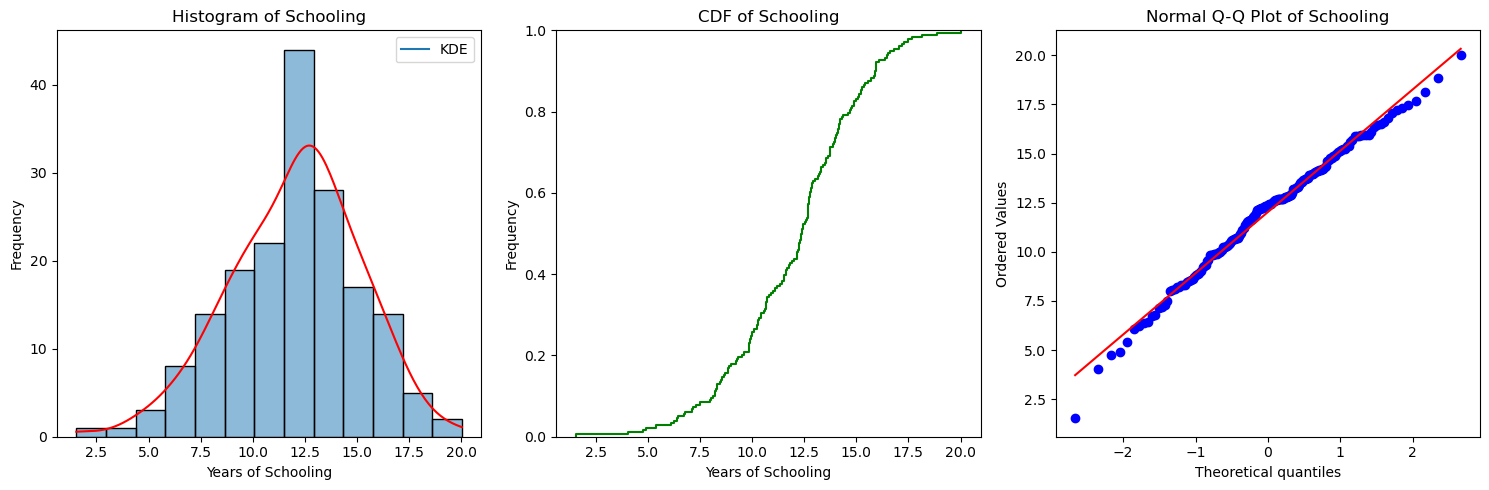

In [14]:
# Explore data

school_list = df_school['Schooling'].to_list()
column = 'Schooling'
xlabel = 'Years of Schooling'

fig, axes = plt.subplots(1, 3, figsize=(15, 5))                             # Create subplots

sns.histplot(school_list, kde=True, line_kws={'label':'KDE'}, ax=axes[0])   # Plot histogram and density curve (KDE)
axes[0].set_title(f'Histogram of {column}')                                 
axes[0].set_xlabel(xlabel)                                                     
axes[0].set_ylabel('Frequency')                                                
axes[0].legend()
axes[0].lines[0].set_color('red')                                           # Change KDE color (workaround because line_kws ignores {'color':'red'} for dumb reasons I don't really understand...)

sns.ecdfplot(school_list, ax=axes[1], color='green')                        # Plot CDF
axes[1].set_title(f'CDF of {column}')                                   
axes[1].set_xlabel(xlabel)                                                     
axes[1].set_ylabel('Frequency')         

ss.probplot(school_list, dist='norm', plot=axes[2])
axes[2].set_title(f'Normal Q-Q Plot of {column}') 

plt.tight_layout()                                                          # Tight layout prevents overlapping axis labels
plt.show()

### <span style="color: purple">Data distribution looks more or less normal</span>


[]

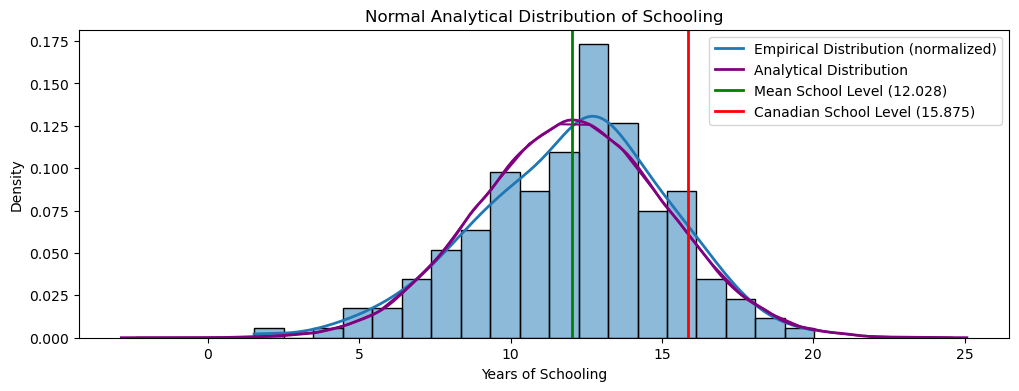

In [29]:
#Analytical for Schooling

mu = df_school['Schooling'].mean()
sigma = df_school['Schooling'].std()
normz = ss.norm(mu, sigma)                                                                                  # Create mathmatical representation of the distribution (object)
cnd_school = df_school[df_school['Country']=='Canada']["Schooling"].iloc[0]

plt.figure(figsize=(12,4))

sns.histplot(school_list, binwidth=1, stat="density", kde=True, 
             line_kws={'label':'Empirical Distribution (normalized)', 'linewidth': 2})                                   # Plots empirical distribution
sns.histplot(data=normz.rvs(100000), binwidth=1, color='purple', 
             stat='density', element='poly', fill=False, kde=True, 
             line_kws={'label':'Analytical Distribution', 'linewidth':2})                                   # Plots normal distribution using 10,000 randomly generated samples from an analytical model
plt.axvline(mu, color="green", label=f'Mean School Level ({round(mu, 3)})', linewidth=2)                    # Marks the mean
plt.axvline(cnd_school, color="red", label=f'Canadian School Level ({round(cnd_school, 3)})', linewidth=2)  # Marks the Canadian value

plt.legend()
plt.title(f'Normal Analytical Distribution of {column}')                                   
plt.xlabel(xlabel)              
plt.plot()

# INCOMPLETE

In [43]:
# Percentage of people with a schooling level within 1 year of Canada’s

low = cnd_school - 1
high = cnd_school + 1

cdf_school = thinkstats2.Cdf(school_list)
pct_btw_cnd = round((cdf_school.Prob(high)-cdf_school.Prob(low))*100,1)
print(f'Percentage within One Year of Canada\'s School level: {pct_btw_cnd}%')

Percentage within One Year of Canada's School level: 14.0%


### Part 3: Create another analytical distribution for GDP per Capita (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing it alongside the emperical. You have free reign on how. 
<li>5 points are for using the analytical distribution to evaluate the quality of your GDP per capita metric - does it appear accurate? Why or why not?
<li>If you've judged GDP per cap to be unreliable, drop it. 
</ul>

In [23]:
# Explore data

df['GDPperCapita'].describe()

count      144.000000
mean      6886.716335
std      11457.048602
min        117.466394
25%        735.594643
50%       2424.224604
75%       6083.726099
max      63337.610450
Name: GDPperCapita, dtype: float64

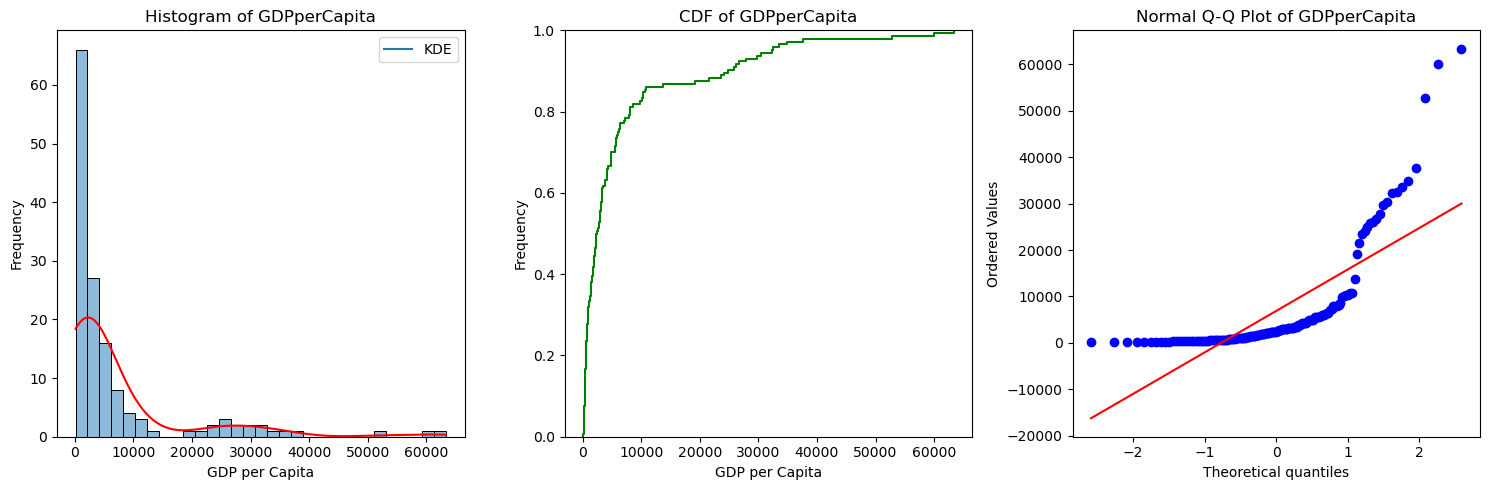

In [31]:
# Explore data

gdp_cap_list = df['GDPperCapita'].to_list()
column = 'GDPperCapita'
xlabel = 'GDP per Capita'

fig, axes = plt.subplots(1, 3, figsize=(15, 5))                             # Create subplots

sns.histplot(gdp_cap_list, kde=True, line_kws={'label':'KDE'}, ax=axes[0])   # Plot histogram and density curve (KDE)
axes[0].set_title(f'Histogram of {column}')                                 
axes[0].set_xlabel(xlabel)                                                     
axes[0].set_ylabel('Frequency')                                                
axes[0].legend()
axes[0].lines[0].set_color('red')                                           # Change KDE color (workaround because line_kws ignores {'color':'red'} for dumb reasons I don't really understand...)

sns.ecdfplot(gdp_cap_list, ax=axes[1], color='green')                        # Plot CDF
axes[1].set_title(f'CDF of {column}')                                   
axes[1].set_xlabel(xlabel)                                                     
axes[1].set_ylabel('Frequency')         

ss.probplot(gdp_cap_list, dist='norm', plot=axes[2])
axes[2].set_title(f'Normal Q-Q Plot of {column}') 

plt.tight_layout()                                                          # Tight layout prevents overlapping axis labels
plt.show()

### <span style="color: purple">Data distribution is exponential</span>


In [ ]:
#Analytical for GDP/capita

mu = df['GDPperCapita'].mean()
sigma = df['GDPperCapita'].std()
normz = ss.norm(mu, sigma)                                                                                  # Create mathmatical representation of the distribution (object)
#cnd_school = df[df['Country']=='Canada']["Schooling"].iloc[0]

plt.figure(figsize=(12,4))

sns.histplot(gdp_cap_list, binwidth=1, stat="density", kde=True, 
             line_kws={'label':'Empirical Distribution (normalized)', 'linewidth': 2})                                   # Plots empirical distribution
sns.histplot(data=normz.rvs(100000), binwidth=1, color='purple', 
             stat='density', element='poly', fill=False, kde=True, 
             line_kws={'label':'Analytical Distribution', 'linewidth':2})                                   # Plots normal distribution using 10,000 randomly generated samples from an analytical model
plt.axvline(mu, color="green", label=f'Mean School Level ({round(mu, 3)})', linewidth=2)                    # Marks the mean
#plt.axvline(cnd_school, color="red", label=f'Canadian School Level ({round(cnd_school, 3)})', linewidth=2)  # Marks the Canadian value

plt.legend()
plt.title(f'Normal Analytical Distribution of {column}')                                   
plt.xlabel(xlabel)              
plt.plot()

### Part 4: Visually identify correlations. Separate developed and not developed countries is some way. (15pts)

<ul>
<li>5 points are for effectively and clearly showing the visualizations used to evaluate correlations.
<li>10 points are for, in the process of visualizing, remove outliers that confound correlations. List outlier "filters" you used and justify why - was the data an error, a real value that is just way out of line, or somethingn else? Remember, you're trying to find things that have correlations with each other. Looking at a correlation between home size and income may not benefit from Jeff Bezos being included. It may be helpful to look at the results and revise. 
</ul>

In [21]:
#Visualize correlations. 

### Part 5: Calculate correlations (25pts)

<ul>
<li>5 points are for identifying and calculating 3 strongest correlations with life expectancy for each of developed and not developed. 
<li>10 points are for analyzing those correlations. Do they appear to be supported by reality? Do you have reason to beleive any are causal?
<li>10 points are for identifying 2 places where developing and developed countries have a substantially different relationship with respect to life expectancy, and theorizing why. What would be needed to confirm your thoughts?
</ul>

<b>Please put your written parts in markdown cells, with a little formatting to make them readable. 

In [22]:
#Calculate correlations and analyze. 